In [ ]:
## This code toggles all code cells displaying on or off, so we can see output and markdown cells only.
## All code cells display can be toggled on/off.

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
## Import all the things

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline 

# The Carpentries: Programmatic Assessment Report
## 2017 Year End and 2018 Q1
#### Authors: Maneesha Sane, Erin Becker

## Part 1: Workshops over time

### Workshops by Carpentry by Year

We began systematically recording data for our workshops in 2012. We can use this data to investigate how have The Carpentries have grown over the years in terms of number of workshops per year and how Data Carpentry has grown in comparison with Software Carpentry. For these analyses, we will consider only Software Carpentry and Data Carpentry workshops held between January 1st, 2012 and March 31st, 2018. Instructor Training events are analyzed in a later portion of this report.

For each of our workshops, we collected the following data:

| variable | definition |
| -------- | ----------- | 
| slug | Unique identifier for each workshop. Takes the form `YYYY-MM-DD-sitename`. |
| start | Start date of the workshop. Takes the form `YYYY-MM-DD`. |
| attendance | Number of learners at the workshop. | 
| host_name | Institution that hosted the workshop. | 
| country | The two-letter country code for the country in which the workshop was held. |
| workshop_type | Whether this is a Software Carpentry (SWC) or Data Carpentry (DC) workshop. | 

In [2]:
# Load csv into df
workshops = pd.read_csv("data_files/workshops.csv")

# Clean up the tag names
workshops.loc[workshops['tag_name'].str.contains("SWC"), "workshop_type"] = "SWC"
workshops.loc[workshops['tag_name'].str.contains("DC"), "workshop_type"] = "DC"
workshops.loc[workshops['tag_name'].str.contains("LC"), "workshop_type"] = "LC"
workshops.loc[workshops['tag_name'].str.contains("TTT"), "workshop_type"] = "TTT"

workshops = workshops.drop('tag_name', axis=1)

# Clean up attendance value - this is inconsistently stored as NaN or 0
# All zero values should be NaN
workshops['attendance'] =  workshops['attendance'].replace(0.0, np.nan)

# Remove online events like maintainer onboarding 
workshops = workshops.drop(workshops[workshops.country == "W3"].index)

# Date data type
workshops['start'] = pd.to_datetime(workshops['start'])

# Remove instructor training events; these will be analyzed separately.
# Limit to non TTT workshops
workshops_nonTTT = workshops[workshops['workshop_type'] != "TTT"]
workshops_nonTTT.head();

# Note: to preview the data table, remove the semi-colon (;) from the end of the line above

In [4]:
workshops_by_carpentry_year = workshops_nonTTT.groupby([workshops_nonTTT['start'].dt.year, 'workshop_type'])['slug'].count().unstack()
workshops_by_carpentry_year['total'] = workshops_by_carpentry_year.sum(axis=1)
workshops_by_carpentry_year.index.values
workshops_by_carpentry_year = workshops_by_carpentry_year.rename(index = {2018:'2018Q1'})
workshops_by_carpentry_year

# Values should be ints not floats


workshop_type,DC,SWC,total
start,,,
2012,NaN,38.0,38.0
2013,NaN,93.0,93.0
2014,2.0,137.0,139.0
2015,31.0,243.0,274.0
2016,72.0,273.0,345.0
2017,81.0,256.0,337.0
2018Q1,21.0,76.0,97.0


#### Figure 1. The Carpentries workshops by year.

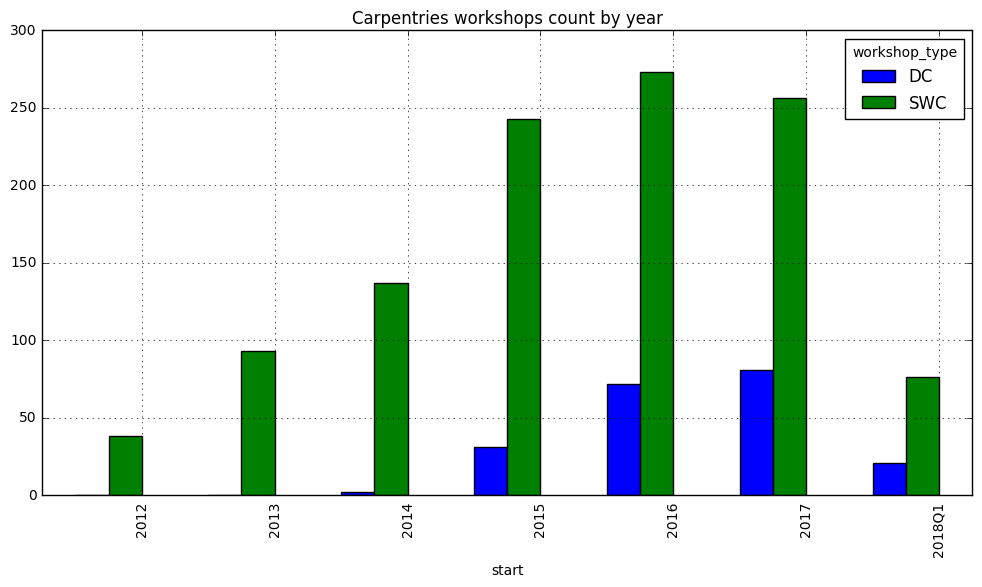

In [6]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = .5
title = "Carpentries workshops count by year"
workshops_by_carpentry_year.plot(y = ["DC", "SWC"], kind='bar', ax=ax, width=width, position=1, title=title)

ax.grid(True)

plt.show()

#### Table 1. The Carpentries workshops by year.

The number of Software Carpentry and Data Carpentry workshops appear to have remained roughly steady for the past several years, after a sharp jump from 2014 to 2015. The year 2015 was the first year in which The Carpentries had staff and a dedicated database to track workshop data, so some of this growth may instead reflect a growth in internal systems.

The data shown here may not account for unreported self-organized workshops. Although The Carpentries attempts to collect data on all workshops run under "The Carpentries" brand, sometimes institutions may run a workshop without reporting it back to The Carpentries staff. Thus, if there has been a shift from more centrally-organized to more self-organized workshops, this may cause an underestimate of our workshop growth. We are working to improve data collection to have more accurate reflections of our scope of work.

### Workshops by Carpentry by Year and Country
The table and chart below show a count of the number of Carpentry workshops (SWC or DC) that took place in each country each year, plus 2018Q1.  The majority of workshops have been in the United States, Great Britain, Canada, and Australia.

### Table: Count Total SWC and DC workshops by year and country

In [ ]:
workshops_by_country_year = workshops_nonTTT.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year = workshops_by_country_year.fillna(0)
workshops_by_country_year.rename(columns={2018: '2018Q1'}, inplace=True)
workshops_by_country_year['total'] = workshops_by_country_year.sum(axis=1)
workshops_by_country_year

# Values should be ints not floats

### Chart: Count Total SWC and DC workshops by country by year
*How can we make this chart easier to read?*

In [ ]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

title = "Carpentries workshops by country by year"
workshops_by_country_year.plot(y = list(workshops_by_country_year)[:-1], kind='bar', ax=ax, position=1, title=title)

ax.grid(True)

plt.show()

list(workshops_by_country_year)

### Compare Q1 2017 and Q1 2018 Workshops by country: table view

The table and chart below show the number of workshops in each country for the first quarters of 2017 and 2018.  Most countries saw an increase in the number of workshops run. However, Australia, Canada, and New Zealand all reported decreases.

In [ ]:
# # Get all workshops for 2017 Q1
workshops_2017Q1 = workshops_nonTTT[(workshops_nonTTT['start'].dt.year == 2017) & (workshops_nonTTT['start'].dt.month <= 3)]

# # Get all workshops for 2018 Q1
workshops_2018Q1 = workshops_nonTTT[(workshops_nonTTT['start'].dt.year == 2018) & (workshops_nonTTT['start'].dt.month <= 3)]

# 2017 Q1 workshops by country
workshops_by_country_year_2017Q1 = workshops_2017Q1.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2017Q1.rename(columns={2017:'2017Q1'}, inplace=True)

# 2018 Q1 workshops by country
workshops_by_country_year_2018Q1 = workshops_2018Q1.groupby(['country', workshops_nonTTT['start'].dt.year])['slug'].count().unstack()
workshops_by_country_year_2018Q1.rename(columns={2018:'2018Q1'}, inplace=True)

# Concatenated table, 2017 Q1 and 2018 Q1 workshops by country
workshops_by_country_year_1718Q1 = pd.concat([workshops_by_country_year_2017Q1, workshops_by_country_year_2018Q1], axis=1)

workshops_by_country_year_1718Q1
# Values should be ints not floats

### Compare Q1 2017 and Q1 2018 Workshops by country: chart view

In [ ]:
fig = plt.figure(figsize=(12, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.25

workshops_by_country_year_1718Q1['2017Q1'].plot(kind='bar', color='lightgreen', ax=ax, width=width, position=1, edgecolor = 'green',  linewidth = 1)
workshops_by_country_year_1718Q1['2018Q1'].plot(kind='bar', color='lightblue', ax=ax, width=width, position=0, edgecolor = 'blue',  linewidth = 1)

ax.legend(["2017 Q1", "2018 Q1"]);

# ax.set_xticklabels(workshops_by_country_2018_Q1_all_countries.country)
ax.grid(True)

plt.title("Count workshops by country, Q1 2017 & Q1 2018")

plt.show()

### Proportion of 2017 workshops that were in 2017 Q1
Rather than comparing 2017 Q1 and 2017 Q1, can we compare all 2017 and projected 2018?  This value is very close to 25%. 

In [ ]:
total2017 = workshops_nonTTT[workshops_nonTTT['start'].dt.year == 2017]
Q1_2017 = total2017[total2017['start'].dt.month <= 3]

total2017_count = len(total2017)
Q1_2017_count = len(Q1_2017)


Q1_2017_proportion = Q1_2017_count/total2017_count
Q1_2017_proportion


### When did each country have its first workshop?

Data goes back to 2012; some countries may have been holding Carpentries workshops before this time.

In [ ]:
w2 = workshops_by_country_year.copy()

# See https://stackoverflow.com/questions/31828240/first-non-null-value-per-row-from-a-list-of-pandas-columns
# and
# https://stackoverflow.com/questions/38467749/find-first-non-zero-value-in-each-row-of-pandas-dataframe

# Fill zero values with Nan to make them non valid values
res = w2[w2 != 0.0]

first_workshop = res.apply(pd.Series.first_valid_index, axis=1)
first_workshop = first_workshop.to_frame('year')
first_workshop





### How many countries had their first workshop each year?
This table should be sorted by year.

In [ ]:
pd.value_counts(first_workshop['year'].values, sort=False).to_frame()

### Which countries had their first workshop in 2017?

Five countries, all in Africa, had their first workshop in 2017. This is representative of the significant growth we've seen in this part of the world.

In [ ]:
first_workshop_2017 = first_workshop[first_workshop.year == 2017]
first_workshop_2017

## Attendance at workshops

### Workshops missing attendance

This is a full list of all workshops that did not report attendance back to the Carpentries.  Reasons for this may vary and demonstrate a need for Carpentries staff, workshop hosts, and instructors to better collect and record this data.

121 of 1323 (about 9%) workshops were missing attendance.

In [ ]:
missing_attendance = workshops_nonTTT[pd.isnull(workshops['attendance'])]
missing_attendance

### Scatter plot showing frequency of attendance rates

Each dot represents the total attendance for one workshop.  This will show the range of our workshop sizes, as well as whether our workshops are generally growing or shriking in size.


In [ ]:
attendance = workshops_nonTTT[['start', 'attendance']]   #df['date'].dt.year
attendance['year'] = attendance['start'].dt.year
title = "Frequency of attendance rates by year"
attendance.plot.scatter('year', 'attendance', title=title)

### Total attendance by year: Table view

This table shows the total number of learners at Carpentries workshops each year.  
Knowing that in 2017, 23.4% of workshops took place in Q1, we would expect to see 7414 learners in 2018, keeping us roughly steady for the past few years.

In [ ]:
total_attendance_by_year = attendance.groupby('year')['attendance'].sum().to_frame()
total_attendance_by_year


### Total attendance by year: Chart view

In [ ]:
total_attendance_by_year.plot.bar(title="Total Attendance by Year")

### Binned attendance by year

This table shows by year, how many workshops had 1-10 learners, 11-20 learners, and so on.  

In [ ]:
bins = pd.cut(attendance['attendance'], [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf])
attendance.groupby(bins)['attendance'].agg(['count'])

binned_attendance_by_year = attendance.groupby([ bins, 'year'])['attendance'].agg(['count'])

binned_attendance_by_year =  binned_attendance_by_year.unstack()
binned_attendance_by_year['total'] = binned_attendance_by_year.sum(axis=1)
binned_attendance_by_year = binned_attendance_by_year.rename(index=str, columns={2018:"2018Q1"})

binned_attendance_by_year


## Instructor Training

This tables lists all instructor training events the Carpentries has held since 2012. The "count_badged" column is a total of all individuals from that event with at least one badge.  We are not distinguishing between Software Carpentry and Data Carpentry badges.

In [ ]:
badges_by_training_event = pd.read_csv("data_files/badges_by_training_event.csv")

badges_by_training_event['pct_completion'] = badges_by_training_event['count_badged'] / badges_by_training_event['attendance'] * 100
badges_by_training_event = badges_by_training_event.round({'pct_completion':1})
badges_by_training_event['start'] = pd.to_datetime(badges_by_training_event['start'])

badges_by_training_event

### Number of instructor training events by country

This table shows how many training events took place in each country.  Inperson events are noted as taking place in a specific country. All online events are noted as online, even if the trainees came entirely from one country. 

In [ ]:
trainigs_by_country = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['slug'].count().unstack()
trainigs_by_country['total'] = trainigs_by_country.sum(axis=1)
trainigs_by_country.index.values
trainigs_by_country = trainigs_by_country.rename(index = {2018:'2018Q1'})
trainigs_by_country

### Binned completion rates for instructor training events by year

This shows the count of events by completion rates.  For example, six events in 2016 had a completion rate under 25%.  The counts are binned by quartiles, separating out events with 100% completion rates (two events total).

In [ ]:
bins = pd.cut(badges_by_training_event['pct_completion'], [0, 25, 50, 75, 99, 100])
binned_badges_by_year = badges_by_training_event.groupby([ bins, badges_by_training_event['start'].dt.year])['pct_completion'].agg(['count'])

binned_badges_by_year =  binned_badges_by_year.unstack()
binned_badges_by_year['total'] = binned_badges_by_year.sum(axis=1)

binned_badges_by_year


### Attendance and number badged by year

#### Total attendance by year

This table shows the total number of trainees at instructor training events each year by country.

In [ ]:
attendance_by_year = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['attendance'].sum().unstack()
attendance_by_year

# trainigs_by_country = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['slug'].count().unstack()


#### Total badged by year

This table shows the total number of trainees who were awarded badges at instructor training events each year by country.

In [ ]:
badges_by_year = badges_by_training_event.groupby([badges_by_training_event['start'].dt.year, 'country'])['count_badged'].sum().unstack()
badges_by_year


#### Percent of trainees badged per year
This is calculated from the above two tables. Note the country data shows the country the event was held in, not the country the trainee is based in.  The year is the year the event was held, not the year the badge was issued.

In [ ]:
percent_badged_by_year = badges_by_year/attendance_by_year*100
percent_badged_by_year = percent_badged_by_year.round(1)
percent_badged_by_year

### Comparison:  Inperson vs Online Training Events

The table and char below show the number of training events we have held each year, separated by online and inperson events.  

#### Number of events per year

In [ ]:
countries = list(trainigs_by_country)
countries.remove('W3')
countries.remove('total')
inperson_trainings = trainigs_by_country[countries].sum(axis = 1).to_frame()

online_trainings = trainigs_by_country[['W3']]

trainings_online_inperson = pd.concat([inperson_trainings, online_trainings], axis=1)

trainings_online_inperson.rename(columns = {0:'in-person', 'W3':'online'}, inplace=True)

trainings_online_inperson


In [ ]:
title = "Online and In-person training events by year"
trainings_online_inperson[['online','in-person']].plot(kind='bar', stacked=True, title=title)